## Author : Sapna Singh

## THE SPARKS FOUNDATION INTERNSHIP

# Task 7: Stock Market Prediction using Numerical and Textual Analysis



### **Problem Statement**: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.
**Stock to analyze and predict** - SENSEX (S&P BSE SENSEX)


## *Importing the libraries* 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import datetime
#!pip install textblob
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vader
from pandas.plotting import andrews_curves
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

###  Importing and reading the dataset

#### Dataset_1(Stock Price)

In [2]:
stock_price = pd.read_csv(r'C:\Users\sapna\Desktop\TSF_Intenship\Task 7\AAPL.csv')
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,0.265625,0.272321,0.260045,0.265625,0.228800,452312000
1,2001-01-03,0.258929,0.297991,0.257813,0.292411,0.251872,817073600
2,2001-01-04,0.323940,0.330357,0.300223,0.304688,0.262447,739396000
3,2001-01-05,0.302455,0.310268,0.286830,0.292411,0.251872,412356000
4,2001-01-08,0.302455,0.303292,0.284598,0.295759,0.254756,373699200


In [3]:
#To check the no. of rows and columns.
stock_price.shape

(5031, 7)

In [4]:
#Checking null count for each column
stock_price.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
# dropping duplicates in data
stock_price = stock_price.drop_duplicates()

In [6]:
#dataypes 
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 0 to 5030
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5031 non-null   object 
 1   Open       5031 non-null   float64
 2   High       5031 non-null   float64
 3   Low        5031 non-null   float64
 4   Close      5031 non-null   float64
 5   Adj Close  5031 non-null   float64
 6   Volume     5031 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 314.4+ KB


In [7]:
#Converting Date column to datetime datatype
stock_price['Date'] = pd.to_datetime(stock_price['Date'], format= '%Y-%m-%d')
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 0 to 5030
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5031 non-null   datetime64[ns]
 1   Open       5031 non-null   float64       
 2   High       5031 non-null   float64       
 3   Low        5031 non-null   float64       
 4   Close      5031 non-null   float64       
 5   Adj Close  5031 non-null   float64       
 6   Volume     5031 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 314.4 KB


In [8]:
stock_price['Returns'] = stock_price['Adj Close'].pct_change()# pct_change Compute the difference of two elements
stock_price = stock_price.dropna()# dropping na values
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
1,2001-01-03,0.258929,0.297991,0.257813,0.292411,0.251872,817073600,0.100839
2,2001-01-04,0.323940,0.330357,0.300223,0.304688,0.262447,739396000,0.041986
3,2001-01-05,0.302455,0.310268,0.286830,0.292411,0.251872,412356000,-0.040294
4,2001-01-08,0.302455,0.303292,0.284598,0.295759,0.254756,373699200,0.011450
5,2001-01-09,0.300223,0.315011,0.295759,0.306920,0.264370,588929600,0.037738


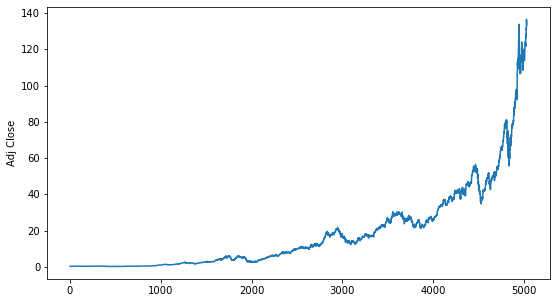

In [9]:
#plotting Adj close 
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)# setting fig size 
sns.lineplot(stock_price.index ,stock_price['Adj Close'])# setting stock_price ad index

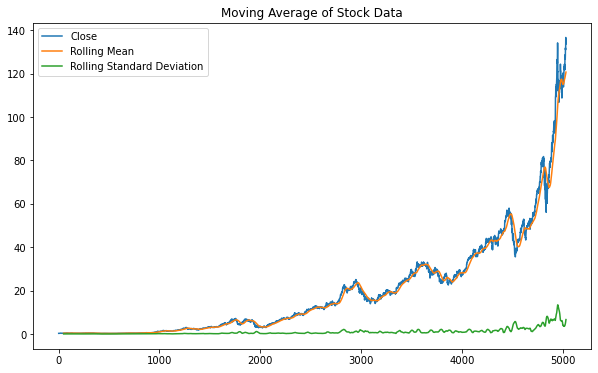

In [10]:
#Moving Average
TITLE='Moving Average of Stock Data'
close = stock_price['Close'] 
m_avg = close.rolling(window = 50).mean()  # 50 days moving average 
std = close.rolling(window = 50).std() ## std deviation 

plt.figure(figsize=(10,6))
plt.title(TITLE)
stock_price['Close'].plot(label = 'Close')
m_avg.plot(label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

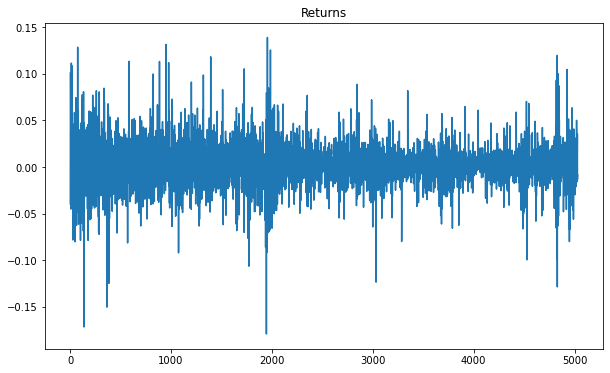

In [11]:
#Plotting returns from column which we created above 
plt.figure(figsize = (10,6))
stock_price['Returns'].plot(label='Return')
plt.title("Returns")

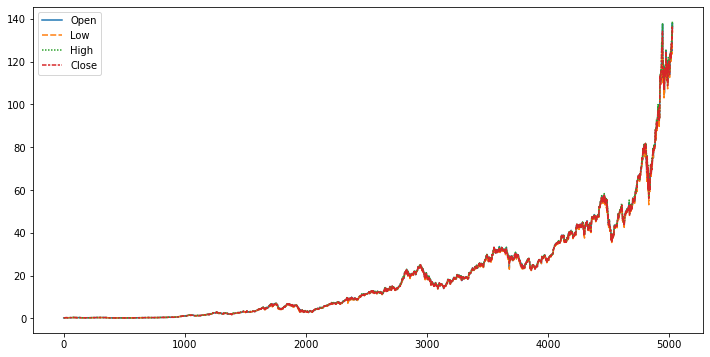

In [12]:
## plottting open, low, high,close in single plot 
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax = sns.lineplot(data=stock_price[['Open', 'Low', 'High', 'Close']])

#### Loading Dataset_2(News Headlines)

In [13]:
news_headlines= pd.read_csv(r'C:\Users\sapna\Desktop\TSF_Intenship\Task 7\india-news-headlines.csv')
news_headlines.head()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
#Dimension of news_headline dataset
news_headlines.shape

In [ ]:
##checking for null values in our datset
news_headlines.isnull().sum()

In [ ]:
#renaming publish_date to Date 
news_headlines.rename(columns = {'publish_date':'Date'}, inplace = True)  

In [ ]:
## changing data type of Date column to Date
news_headlines['Date'] = pd.to_datetime(news_headlines['Date'], format= '%Y%m%d')
news_headlines.info()

In [ ]:
#dropping headling_Category column
news_headlines.drop('headline_category', axis= 1, inplace= True)
news_headlines.head()

In [ ]:
# dropping duplicates in data
news_headlines=news_headlines.drop_duplicates()

In [ ]:
news_headlines['News'] = news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news_headlines.drop_duplicates(subset='Date', keep='first', inplace=True)
news_headlines.reset_index(inplace = True, drop = True)
news_headlines

In [ ]:
#converting news data to lowercase
news_headlines['headline_text'] = news_headlines['headline_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
news_headlines['headline_text'].head()

In [ ]:
news_headlines['headline_text'].value_counts()

In [ ]:
## removiing unnecessary words and replacing it with space
news_headlines.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
news_headlines.head()

## Word Cloud 

In [ ]:
headlines = ' '.join(news_headlines['headline_text'].str.lower().values[-1000:])
wordcloud = WordCloud(max_font_size=None,width = 2500, height = 1200).generate(headlines)
plt.figure(figsize = (12, 16))
plt.imshow(wordcloud)
plt.title('Top words in headline',size=30)
plt.axis("off")
plt.show()

# Merging Data

In [ ]:
#news_headlines.rename(columns = {'publish_date':'Date'}, inplace = True) 

data_merged = pd.merge(stock_price, news_headlines, how='inner', on='Date')
data_merged.dropna()

In [ ]:
data_merged = data_merged[data_merged['Date']>='2015-01-01'] #Decreasing size of our data 
data_merged = data_merged.dropna(how='any',axis=0) #dropping null entries in our data
data_merged = data_merged.drop_duplicates() #dropping duplicate values
data_merged

In [ ]:
#Resetting Index
data_merged = data_merged.reset_index()
del data_merged['index']
data_merged


In [ ]:
# Recheck the count
print(data_merged.count())

# Sentimental Analysis 

In [ ]:
# Sentiment Analysis of news headline 
data_merged['sentiment'] = data_merged['headline_text'].apply(lambda x: TextBlob(x).sentiment[0])
data_merged.head()

In [ ]:
## finding polarity  of headline text
sid = vader()
data_merged['x'] = data_merged['headline_text'].apply(lambda x: sid.polarity_scores(x))
#data_merged.head()
data_merged['compound'] =data_merged['x'].apply(lambda dict: dict['compound'])
data_merged['positive'] = data_merged['x'].apply(lambda dict: dict['pos'])
data_merged['negative'] = data_merged['x'].apply(lambda dict: dict['neg'])
data_merged['neutral'] = data_merged['x'].apply(lambda dict: dict['neu'])
data_merged = data_merged.drop('x',axis=1)
data_merged

In [ ]:
#Price Indication (Price Movement)
#lies between 0 to 1
data_merged['Price Indication'] = np.where(data_merged['Close'].shift(-1)>data_merged['Close'],1,0)
data_merged.head()

## Training and testing 

In [ ]:
x = data_merged[['sentiment','Open','High','Low','Close','Adj Close','compound','positive','negative','neutral']]
y = data_merged['Price Indication']

In [ ]:
#Dividing data into Training and Test sets with ratio 80% AND 20%

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)

In [ ]:
#DecisionTreeRegressor Model
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

predictions = dtr.predict(x_test)
print('Mean Squared error: ',mean_squared_error(predictions,y_test))

In [ ]:
#AdaBoostRegressor Model

adb = AdaBoostRegressor()
adb.fit(x_train, y_train)

predictions = adb.predict(x_test)
print('Mean Squared error: ',mean_squared_error(predictions, y_test))

###  Conclusion

It shows **AdaBoostRegressor Model**  shows a better performance than the others.